In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sn.set()

In [2]:
# Import data_racing_total.csv
raw_data = pd.read_csv('./data/data_total/data_racing_total.csv')

In [3]:
# Set variable x with the features for the model PCA.
x = raw_data.drop('Name', axis=1).values
names = raw_data['Name'].tolist()

In [4]:
# Create an instance of StandardScaler and fill it with the features in variables x. 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [5]:
pca = PCA(n_components=min(raw_data.shape), random_state=42)
x_pca = pca.fit_transform(x_scaled)

Explained variance 0 components: 0
Explained variance 2 components: 0.6726409329405582
Explained variance 4 components: 0.8087815645520872
Explained variance 6 components: 0.883707629372032
Explained variance 8 components: 0.9273698962841399
Explained variance 10 components: 0.9584126896299922
Explained variance 12 components: 0.9773502465429965
Explained variance 14 components: 0.9887063792849737
Explained variance 16 components: 0.9951321292348834
Explained variance 18 components: 0.9986234872423719
Explained variance 20 components: 0.9999825620392959
Explained variance 22 components: 1.0


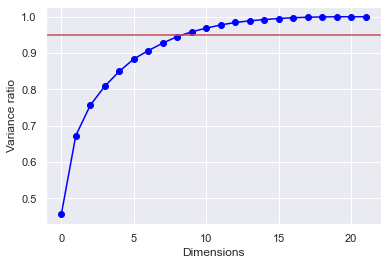

In [6]:
# Assess the variance ratio explained by the cumsum of each component of PCA.
exp = pca.explained_variance_ratio_

for i in range(0, min(raw_data.shape)+1, 2):
    print(f'Explained variance {i} components: {sum(exp[0:i])}')

plt.plot(np.cumsum(exp), '-bo', c='blue')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.xlabel('Dimensions')
plt.ylabel('Variance ratio')
plt.show()

In [7]:
pca = PCA(n_components=2, random_state=42)
x_pca = pd.DataFrame(pca.fit_transform(x_scaled))

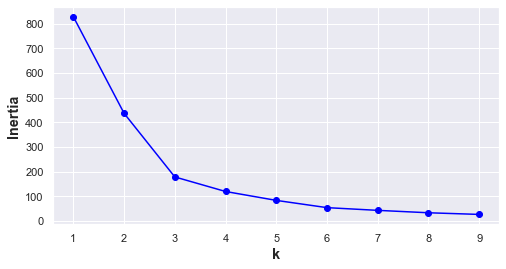

In [8]:
# Determinate the number of clusters using inertia and the silhouette_scores
kmeans_per_k = [KMeans(n_clusters= k, random_state= 42).fit(x_pca) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

fig, ax = plt.subplots(figsize= (8,4))
ax.plot(range(1,10), inertias, 'bo-', c= 'blue')
ax.set_xlabel('k', fontsize='large', fontweight='bold')
ax.set_ylabel('Inertia', fontsize='large', fontweight='bold')

plt.show()

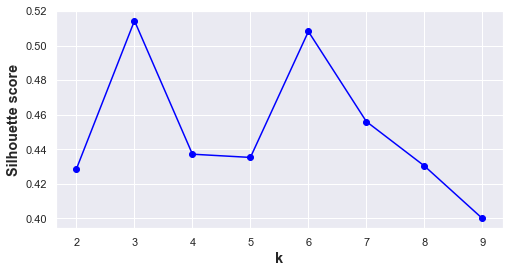

In [9]:
silhouette_scores = [silhouette_score(x_pca, model.labels_) for model in kmeans_per_k[1:]]

fig, ax = plt.subplots(figsize= (8,4))
ax.plot(range(2,10), silhouette_scores, 'bo-', c= 'blue')
ax.set_xlabel('k', fontsize='large', fontweight='bold')
ax.set_ylabel('Silhouette score', fontsize='large', fontweight='bold')
plt.show()

In [10]:
# Create an instance of KMeans with 3 cluster.
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(x_pca)

x_pca['cluster'] = y_pred
x_pca['names'] = names
x_pca.columns = ['x', 'y', 'cluster', 'names']

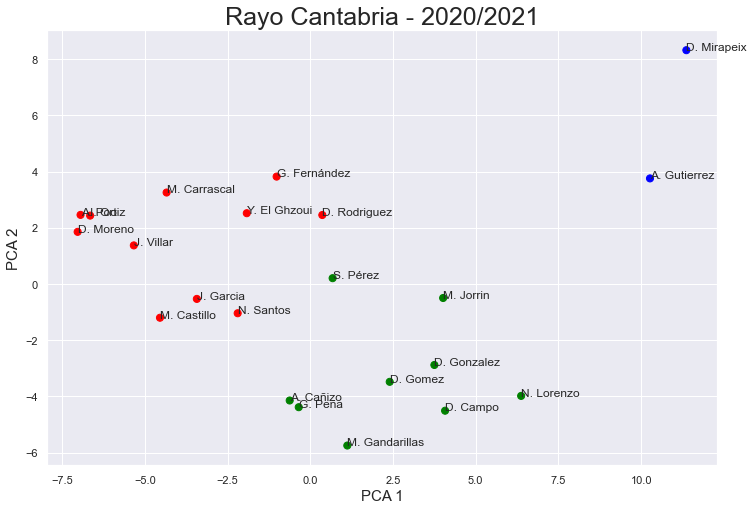

In [11]:
# Create an scatter plot with the 3 clusters.
cl = ['red', 'green', 'blue', 'black']
assign = []

for row in y_pred:
    assign.append(cl[row])

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(x_pca['x'], x_pca['y'], c=assign, s=50)

for i, row in x_pca.iterrows():
    plt.text(row.x, row.y, row.names, fontsize=12)

ax.set_xlabel('PCA 1', fontsize=15)
ax.set_ylabel('PCA 2', fontsize=15)
ax.set_title('Rayo Cantabria - 2020/2021', fontsize=25)

plt.show()